# Exploration of original cases

In this notebook we explore the characteristics of the original artificial cases datasets. We aim to answer the following questions:
- How many cases are there?
- How long are they?
- How many unique tokens are there?
- Are all of they structured in the same way?

We also have some metadata about the cases containing the MeSH terms in it. We will explore the distribution of these terms in the cases.

In [2]:
import pandas as pd
import os

import matplotlib.pyplot as plt

main_path = "data/2_generated/2step_transformation_dt4h_GPT4omini"
lang = "nl"
main_path = os.path.join(main_path, lang)

# Data Exploration

## Amount of data

In [3]:
n_cc = len(os.listdir(main_path))
print("There are {} clinical cases".format(n_cc))

There are 1000 clinical cases


In [4]:
def extract_txt(path, filename):
    total_path = os.path.join(path, filename)
    return filename, open(total_path, "r").read()

def files_to_df(path, extensions=["txt"]):
    files = [x for x in os.listdir(path) if x.split(".")[-1] in extensions]
    data = [extract_txt(path, f) for f in files]
    return pd.DataFrame(data, columns=["filename", "text"])

df = files_to_df(main_path)

In [5]:
df.head()

,filename,text
0,31588087_transformed_step2.txt,{'instruction': 'Translate the text from Engli...
1,31811112_transformed_step2.txt,{'instruction': 'Translate the text from Engli...
2,29735489_2_transformed_step2.txt,{'instruction': 'Translate the text from Engli...
3,32541524_transformed_step2.txt,{'instruction': 'Translate the text from Engli...
4,30713316_2_transformed_step2.txt,{'instruction': 'Translate the text from Engli...


In [6]:
df["text_orig"] = df["text"]
df["text"] = df["text_orig"].apply(lambda x: x.split("'text_to_transform': ")[-1][:-1].replace("'", ""))
df

,filename,text,text_orig
0,31588087_transformed_step2.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...
1,31811112_transformed_step2.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...
2,29735489_2_transformed_step2.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...
3,32541524_transformed_step2.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...
4,30713316_2_transformed_step2.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...
...,...,...,...
995,33678543_transformed_step2.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...
996,35984028_transformed_step2.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...
997,35703424_transformed_step2.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...
998,33296609_transformed_step2.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...


In [7]:
df["n_char"] = df["text"].str.len()
df["n_words"] = df["text"].str.split(r"\n|\s").str.len()
df.head()

,filename,text,text_orig,n_char,n_words
0,31588087_transformed_step2.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,3247,432
1,31811112_transformed_step2.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,2826,375
2,29735489_2_transformed_step2.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,3254,409
3,32541524_transformed_step2.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,3939,484
4,30713316_2_transformed_step2.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,3257,443


Text(0.5, 1.0, 'Number of words in clinical cases')

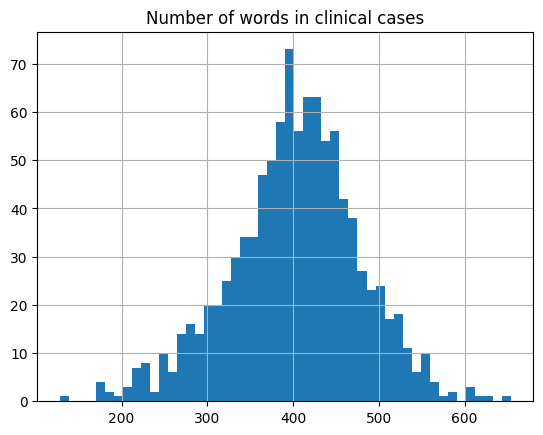

In [8]:
df["n_words"].hist(bins=50)
plt.title("Number of words in clinical cases")

In [9]:
df.describe()

,n_char,n_words
count,1000.000000,1000.000000
mean,2998.755000,402.275000
std,574.207477,75.481725
min,955.000000,128.000000
25%,2657.250000,359.000000
50%,3037.000000,406.000000
75%,3368.500000,450.000000
max,4741.000000,654.000000


In [10]:
long_docs = df[df["n_words"] > 1500]

for i, row in long_docs.iterrows():
    print(row["filename"])
    print(row["text"])
    print("\n\n")

# Structure exploration

Some fields are created when the report is generated. Some interesting conclusions we can extract from below are:

- Not all the generated discharge summaries have the same amount of fields.
- The fields are usually structured as \*\*Section Name:\*\* followed by the content of the section.
- The content can be structured in different ways, some of them are structured in paragraphs, others in bullet points, etc.
- Unknown content is filled with placeholders like \[Datum van Opname\] instead of making it up
- There is some correlation between the amount of fields and the length of the case because it is possible that most of them have placeholders.

In [11]:
print(df.iloc[1]["text"])

**Ontslag Samenvatting**

**Patiëntinformatie:**
- **Naam:** [Patiënt Naam]
- **Leeftijd:** 67 jaar
- **Geslacht:** Vrouw
- **Datum van opname:** Juni 2016
- **Datum van ontslag:** [Ontslagdatum]
- **Diagnose:** Chronisch hartfalen door gedilateerde cardiomyopathie, ernstige mitralisklepinsufficiëntie, paroxysmale atriumfibrillatie, hypothyreoïdie.

**Klinische Presentatie:**
De patiënt presenteerde zich met een geschiedenis van drie weken van verergerend hartfalen, geclassificeerd als New York Heart Association (NYHA) Functionele Klasse IV, gekenmerkt door dyspneu, zwakte en gewichtstoename. De initiële evaluatie toonde een linker ventrikel ejectiefractie (LVEF) van 25% en ernstige mitralisklepinsufficiëntie. De patiënt had een geschiedenis van terugkerende longoedeem en had intubatie en ventilatie nodig.

**Ziekenhuisverloop:**
Bij opname op de Intensive Care Harttherapie Kliniek werd de patiënt behandeld met een intra-aortale ballonpomp (IABP) via toegang via de femorale arterie. Va

In [12]:
# Seems like all the fields are between ** so let's extract them
df["fields"] = df["text"].str.findall(r"\*\*([^\*]+):\*\*")
df["n_fields"] = df["fields"].str.len()
df

,filename,text,text_orig,n_char,n_words,fields,n_fields
0,31588087_transformed_step2.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,3247,432,"[Patiëntinformatie, Naam, Leeftijd, Geslacht, ...",26
1,31811112_transformed_step2.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,2826,375,"[Patiëntinformatie, Naam, Leeftijd, Geslacht, ...",18
2,29735489_2_transformed_step2.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,3254,409,"[Patiëntinformatie, Medische Geschiedenis, Med...",15
3,32541524_transformed_step2.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,3939,484,"[Patiëntinformatie, Hoofdklacht, Anamnese van ...",13
4,30713316_2_transformed_step2.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,3257,443,"[Patiëntinformatie, Geschiedenis, Klinische Be...",9
...,...,...,...,...,...,...,...
995,33678543_transformed_step2.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,3548,451,"[Patiëntinformatie, Reden voor Opname, Medisch...",10
996,35984028_transformed_step2.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,3113,387,"[Patiëntinformatie, Opnamedetails, Klinische S...",7
997,35703424_transformed_step2.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,3700,482,"[Patiëntinformatie, Naam, Leeftijd, Geslacht, ...",20
998,33296609_transformed_step2.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,3171,434,"[Patiëntinformatie, Opnamedatum, Ontslagdatum,...",14


Text(0.5, 1.0, 'Number of fields in clinical cases')

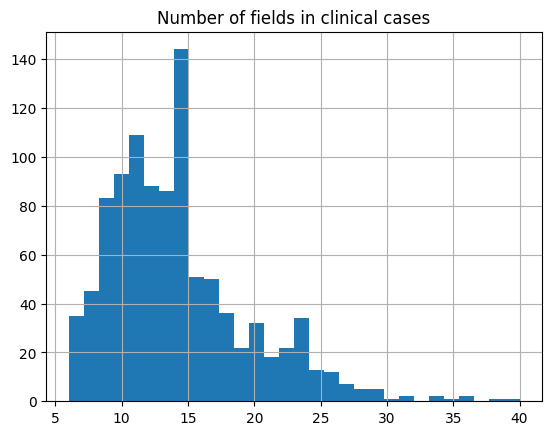

In [13]:
df["n_fields"].hist(bins=30)
plt.title("Number of fields in clinical cases")

In [14]:
df[df["n_fields"] >=50]

,filename,text,text_orig,n_char,n_words,fields,n_fields


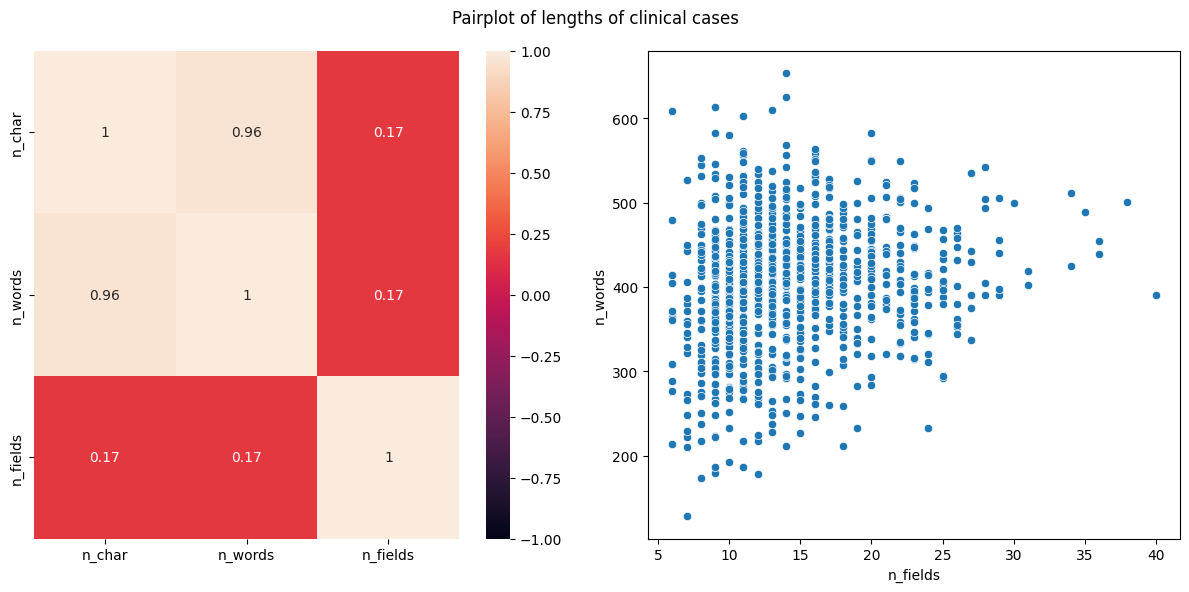

In [15]:
# Heatmap correlation matrix
import seaborn as sns
import numpy as np

cols = ["n_char", "n_words", "n_fields"]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(df[cols].corr(), annot=True, ax=ax[0], vmin=-1, vmax=1)
sns.scatterplot(x="n_fields", y="n_words", data=df, ax=ax[1])

plt.suptitle("Pairplot of lengths of clinical cases")
plt.tight_layout()

In [16]:
df["placeholders"] = df["text"].str.findall(r"\[(.+)\]")
df["n_placeholders"] = df["placeholders"].str.len()
df

,filename,text,text_orig,n_char,n_words,fields,n_fields,placeholders,n_placeholders
0,31588087_transformed_step2.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,3247,432,"[Patiëntinformatie, Naam, Leeftijd, Geslacht, ...",26,"[Patiënt Naam, Opnamedatum, Ontslagdatum, Naam...",6
1,31811112_transformed_step2.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,2826,375,"[Patiëntinformatie, Naam, Leeftijd, Geslacht, ...",18,"[Patiënt Naam, Ontslagdatum, Naam Arts, Titel,...",5
2,29735489_2_transformed_step2.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,3254,409,"[Patiëntinformatie, Medische Geschiedenis, Med...",15,"[Patiëntnaam, Opnamedatum, Ontslagdatum, Uw Na...",6
3,32541524_transformed_step2.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,3939,484,"[Patiëntinformatie, Hoofdklacht, Anamnese van ...",13,"[Patiënt Naam, Opnamedatum, Ontslagdatum, Naam...",5
4,30713316_2_transformed_step2.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,3257,443,"[Patiëntinformatie, Geschiedenis, Klinische Be...",9,"[Naam van de Patiënt, voeg follow-up datum in,...",4
...,...,...,...,...,...,...,...,...,...
995,33678543_transformed_step2.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,3548,451,"[Patiëntinformatie, Reden voor Opname, Medisch...",10,"[Patiënt Naam, Ontslagdatum, Naam Arts, Datum,...",5
996,35984028_transformed_step2.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,3113,387,"[Patiëntinformatie, Opnamedetails, Klinische S...",7,"[Patiënt Naam, Opnamedatum, Ontslagdatum, Naam...",6
997,35703424_transformed_step2.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,3700,482,"[Patiëntinformatie, Naam, Leeftijd, Geslacht, ...",20,"[Anoniem, Datum, Datum, Naam van de arts, Ziek...",9
998,33296609_transformed_step2.txt,**Ontslag Samenvatting**\n\n**Patiëntinformati...,{'instruction': 'Translate the text from Engli...,3171,434,"[Patiëntinformatie, Opnamedatum, Ontslagdatum,...",14,"[Patiënt Naam, Opnamedatum, Ontslagdatum, Arts...",7


Text(0.5, 1.0, 'Number of placeholders in clinical cases')

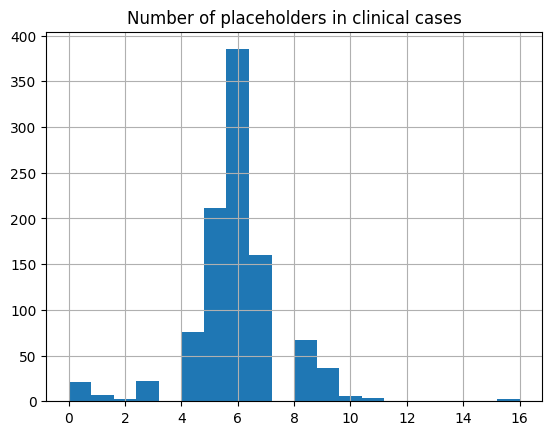

In [17]:
df["n_placeholders"].hist(bins=20)
plt.title("Number of placeholders in clinical cases")

In [18]:
df["cat_ph"] = df["n_placeholders"].apply(lambda x: "0" if x == 0 else "1-5" if x <= 5 else "6-10" if x <= 10 else ">10")

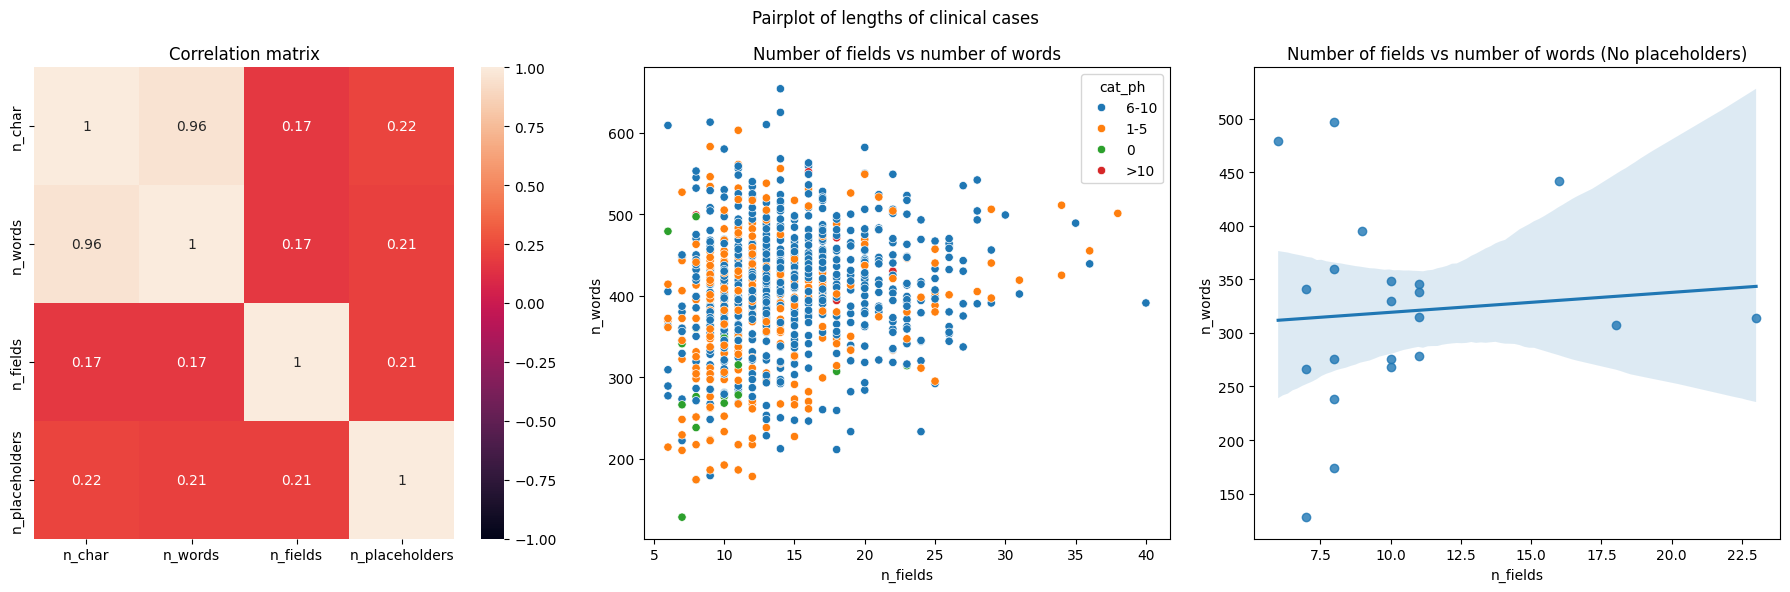

In [19]:
# Heatmap correlation matrix

cols = ["n_char", "n_words", "n_fields", "n_placeholders"]

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.heatmap(df[cols].corr(), annot=True, ax=ax[0], vmin=-1, vmax=1)
ax[0].set_title("Correlation matrix")

sns.scatterplot(x="n_fields", y="n_words", data=df, ax=ax[1], hue="cat_ph")
ax[1].set_title("Number of fields vs number of words")

sns.regplot(x="n_fields", y="n_words", data=df[df["n_placeholders"] == 0], ax=ax[2])
ax[2].set_title("Number of fields vs number of words (No placeholders)")

plt.suptitle("Pairplot of lengths of clinical cases")
plt.tight_layout()

In [20]:
df.describe()

,n_char,n_words,n_fields,n_placeholders
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,2998.755000,402.275000,14.214000,5.864000
std,574.207477,75.481725,5.258884,1.680574
min,955.000000,128.000000,6.000000,0.000000
25%,2657.250000,359.000000,10.000000,5.000000
50%,3037.000000,406.000000,13.000000,6.000000
75%,3368.500000,450.000000,17.000000,7.000000
max,4741.000000,654.000000,40.000000,16.000000
